##* Design MLP with 2 hidden layers (Input Layer - 2 hidden Layer - Output layer) to classify objects (fashionMNIST) and digits (MNIST).
##* Design regularization approaches, and analyze drop/boost in performance of your model. Report results with atleast 2 regularization variants (droput, L1 penalty, L2, L1+L2, Normalization, Noise)

#* tfv5097@psu.edu :Thejasvi Velaga

In [5]:
# baseline cnn model for mnist
import os
import numpy as np
import time
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
seed=5097
np.random.seed(seed)
tf.random.set_seed(seed)
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
# Constants 
size_input = 784
size_hidden = [128,64]
size_output = 10
number_of_train_examples = 10000 #60000
number_of_test_examples = 5000   #10000

## Load Dataset Function

In [7]:
#To load the data set for mist and fashion mnist
def load_dataset():
	# load dataset for mnist
	(trainX_mnist, trainY_mnist), (testX_mnist, testY_mnist) = mnist.load_data()
 #load dataset for fashion mnist
	(trainX_fmnist, trainY_fmnist), (testX_fmnist, testY_fmnist) = fashion_mnist.load_data()

	# one hot encode target values
	trainY_mnist = to_categorical(trainY_mnist)
	testY_mnist = to_categorical(testY_mnist)
 
	trainY_fmnist = to_categorical(trainY_fmnist)
	testY_fmnist = to_categorical(testY_fmnist)
 
	return trainX_mnist, trainY_mnist, testX_mnist, testY_mnist,trainX_fmnist, trainY_fmnist, testX_fmnist, testY_fmnist


##Flatten,Normalize and Reduce data sets size function

In [8]:
# flatten
def flat(train_mnist,test_mnist,train_fmnist,test_fmnist):
  train_x_flatten_mnist = train_mnist.reshape(train_mnist.shape[0],-1)#.T
  test_x_flatten_mnist = test_mnist.reshape(test_mnist.shape[0],-1)#.T
  train_x_flatten_fmnist=train_fmnist.reshape(train_fmnist.shape[0],-1)#.T
  test_x_flatten_fmnist=test_fmnist.reshape(test_fmnist.shape[0],-1)#.T
  return train_x_flatten_mnist, test_x_flatten_mnist,train_x_flatten_fmnist, test_x_flatten_fmnist


In [9]:
# scale pixels
def normalize(train_mnist, test_mnist,train_fmnist,test_fmnist):
	# convert from integers to floats
  train_norm_mnist = train_mnist.astype('float32')
  test_norm_mnist = test_mnist.astype('float32')
  
  train_norm_fmnist = train_fmnist.astype('float32')
  test_norm_fmnist = test_fmnist.astype('float32')
	# normalize to range 0-1
  train_norm_mnist = train_norm_mnist / 255.0
  test_norm_mnist = test_norm_mnist / 255.0

  train_norm_fmnist = train_norm_fmnist / 255.0
  test_norm_fmnist = test_norm_fmnist / 255.0
	# return normalized images
  return train_norm_mnist, test_norm_mnist,train_norm_fmnist, test_norm_fmnist

In [10]:
def reducedatasets(trainX_mnist,trainY_mnist,testX_mnist,testY_mnist,trainX_fmnist,trainY_fmnist,testX_fmnist,testY_fmnist):
  train_x_mnist = trainX_mnist[:number_of_train_examples, :]
  test_x_mnist = testX_mnist[:number_of_test_examples, :]
  train_y_mnist = trainY_mnist[:number_of_train_examples, :]
  test_y_mnist = testY_mnist[:number_of_test_examples, :]
  train_x_fmnist = trainX_fmnist[:number_of_train_examples, :]
  test_x_fmnist = testX_fmnist[:number_of_test_examples, :]
  train_y_fmnist = trainY_fmnist[:number_of_train_examples, :]
  test_y_fmnist = testY_fmnist[:number_of_test_examples, :]
  return train_x_mnist,train_y_mnist, test_x_mnist,test_y_mnist,train_x_fmnist,train_y_fmnist, test_x_fmnist,test_y_fmnist

## Load,FLatten and Normalize 

In [11]:
# loading mnist and fashion mnist and normalizing 
X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,X_train_fmnist, y_train_fmnist, X_test_fmnist, y_test_fmnist = load_dataset()
X_train_mnist, X_test_mnist,X_train_fmnist, X_test_fmnist = flat(X_train_mnist, X_test_mnist,X_train_fmnist, X_test_fmnist)
X_train_mnist, X_test_mnist,X_train_fmnist, X_test_fmnist = normalize(X_train_mnist, X_test_mnist,X_train_fmnist, X_test_fmnist)

4431872/4422102 [==============================] - 0s 0us/step


In [12]:
# reducing training and testing sets 
X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,X_train_fmnist, y_train_fmnist, X_test_fmnist, y_test_fmnist = reducedatasets(X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,X_train_fmnist, y_train_fmnist, X_test_fmnist, y_test_fmnist)

In [13]:
# Split dataset into batches for mnist and fashion mnist
train_ds_mnist = tf.data.Dataset.from_tensor_slices((X_train_mnist, y_train_mnist)).batch(32)
test_ds_mnist = tf.data.Dataset.from_tensor_slices((X_test_mnist, y_test_mnist)).batch(4)

train_ds_fmnist = tf.data.Dataset.from_tensor_slices((X_train_fmnist, y_train_fmnist)).batch(32)
test_ds_fmnist = tf.data.Dataset.from_tensor_slices((X_test_fmnist, y_test_fmnist)).batch(4)


In [54]:
#Testing the mnist and fashion mnist loading
print(' MNIST Dataset Shape:')
print('X_train-ds: ' + str(train_ds_mnist))
print('Y_train-ds: ' + str(test_ds_mnist))
print(' fashion MNIST Dataset Shape:')
print('X_train-ds: ' + str(train_ds_fmnist))
print('Y_train-ds: ' + str(test_ds_fmnist))

 MNIST Dataset Shape:
X_train-ds: <BatchDataset shapes: ((None, 784), (None, 10)), types: (tf.float32, tf.float32)>
Y_train-ds: <BatchDataset shapes: ((None, 784), (None, 10)), types: (tf.float32, tf.float32)>
 fashion MNIST Dataset Shape:
X_train-ds: <BatchDataset shapes: ((None, 784), (None, 10)), types: (tf.float32, tf.float32)>
Y_train-ds: <BatchDataset shapes: ((None, 784), (None, 10)), types: (tf.float32, tf.float32)>


##**The below 3 blocks codes is on models without reguralization,with drop out reguralization and with L1 reguralization repesctively.**




In [14]:
#without any regularization.
class MLP(tf.keras.Model):
  def __init__(self, size_input, size_hidden, size_output, device=None):
    super(MLP, self).__init__()
    """
    size_input: int, size of input layer
    size_hidden: int, size of hidden layer
    size_output: int, size of output layer
    device: str or None, either 'cpu' or 'gpu' or None. If None, the device to be used will be decided automatically during Eager Execution
    """

    # self.size_input = 784
    # self.size_hidden = 128
    # self.size_output = 10
    # self.device = 'gpu'
    self.size_input, self.size_hidden, self.size_output, self.device =\
    size_input, size_hidden, size_output, device
    
    
    # Initialize weights between input layer and hidden layer
    self.W1 = tf.Variable(tf.random.normal([self.size_input, self.size_hidden[0]]))
    # Initialize biases for hidden layer
    self.b1 = tf.Variable(tf.random.normal([1, self.size_hidden[0]]))

    # Initialize weights between hidden layer and hideen layer
    self.W2 = tf.Variable(tf.random.normal([self.size_hidden[0], self.size_hidden[1]]))
    # Initialize biases for hidden layer
    self.b2 = tf.Variable(tf.random.normal([1, self.size_hidden[1]]))

    # Initialize weights between hidden layer and output layer
    self.W3 = tf.Variable(tf.random.normal([self.size_hidden[1], self.size_output]))
    # Initialize biases for output layer
    self.b3 = tf.Variable(tf.random.normal([1, self.size_output]))
    
    # Define variables to be updated during backpropagation
    #self.MLP_variables = [self.W1, self.W2,self.W3,self.W4, self.b1, self.b2, self.b3, self.b4]
    self.MLP_variables = [self.W1, self.W2,self.W3, self.b1, self.b2, self.b3]
    
    
  def forward(self, X):
    """
    forward pass
    X: Tensor, inputs
    """
    if self.device is not None:
      with tf.device('gpu:0' if self.device=='gpu' else 'cpu'):
        self.y = self.compute_output(X)
    else:
      self.y = self.compute_output(X)
      
    return self.y
  
  def loss(self, y_pred, y_true):
    '''
    y_pred - Tensor of shape (batch_size, size_output)
    y_true - Tensor of shape (batch_size, size_output)
    '''
    y_true_tf = tf.cast(tf.reshape(y_true, (-1, self.size_output)), dtype=tf.float32)
    y_pred_tf = tf.cast(y_pred, dtype=tf.float32)

    #categorical_cross_entropy = tf.keras.losses.CategoricalCrossentropy()
    #return categorical_cross_entropy(y_true=y_true,y_pred=y_pred)
    #return tf.keras.losses.sparse_categorical_crossentropy(y_true,y_pred)
    #return tf.losses.mean_squared_error(y_true_tf, y_pred_tf)
    return tf.nn.softmax_cross_entropy_with_logits(logits=y_pred,labels=y_true)
  
  def backward(self, X_train, y_train):
    """
    backward pass
    """
    #optimizer = tf.keras.optimizers.SGD(learning_rate=1e-4)
    optimizer = tf.keras.optimizers.Adam()
    #optimizer = tf.keras.optimizers.Adamax(learning_rate=1e-5)
    with tf.GradientTape() as tape:
      predicted = self.forward(X_train)
      current_loss = self.loss(predicted, y_train)
    grads = tape.gradient(current_loss, self.MLP_variables)
    optimizer.apply_gradients(zip(grads, self.MLP_variables))
        
        
  def compute_output(self, X):
    """
    Custom method to obtain output tensor during forward pass
    """
    # Cast X to float32
    X_tf = tf.cast(X, dtype=tf.float32)
    #Remember to normalize your dataset before moving forward
    #X_tf=X_tf/255.0
    # Compute values in hidden layer
    what = tf.matmul(X_tf, self.W1) + self.b1
    hhat = tf.nn.relu(what)


    what1 = tf.matmul(hhat, self.W2) + self.b2
    hhat1 = tf.nn.relu(what1)
    # Compute output
    output = tf.matmul(hhat1, self.W3) + self.b3
    #Now consider two things , First look at inbuild loss functions if they work with softmax or not and then change this
    #Second add tf.Softmax(output) and then return this variable
    #output=tf.nn.softmax(output)
    return output

In [15]:
#with drop out regularization.
class MLP_Regdp(tf.keras.Model):
  def __init__(self, size_input, size_hidden, size_output, device=None):
    super(MLP_Regdp, self).__init__()
    """
    size_input: int, size of input layer
    size_hidden: int, size of hidden layer
    size_output: int, size of output layer
    device: str or None, either 'cpu' or 'gpu' or None. If None, the device to be used will be decided automatically during Eager Execution
    """

    # self.size_input = 784
    # self.size_hidden = 128
    # self.size_output = 10
    # self.device = 'gpu'
    self.size_input, self.size_hidden, self.size_output, self.device =\
    size_input, size_hidden, size_output, device
    
    
    # Initialize weights between input layer and hidden layer
    self.W1 = tf.Variable(tf.random.normal([self.size_input, self.size_hidden[0]]))
    # Initialize biases for hidden layer
    self.b1 = tf.Variable(tf.random.normal([1, self.size_hidden[0]]))

    # Initialize weights between hidden layer and hideen layer
    self.W2 = tf.Variable(tf.random.normal([self.size_hidden[0], self.size_hidden[1]]))
    # Initialize biases for hidden layer
    self.b2 = tf.Variable(tf.random.normal([1, self.size_hidden[1]]))

    # Initialize weights between hidden layer and output layer
    self.W3 = tf.Variable(tf.random.normal([self.size_hidden[1], self.size_output]))
    # Initialize biases for output layer
    self.b3 = tf.Variable(tf.random.normal([1, self.size_output]))
    
    # Define variables to be updated during backpropagation
    #self.MLP_variables = [self.W1, self.W2,self.W3,self.W4, self.b1, self.b2, self.b3, self.b4]
    self.MLP_variables = [self.W1, self.W2,self.W3, self.b1, self.b2, self.b3]
    
    
  def forward(self, X):
    """
    forward pass
    X: Tensor, inputs
    """
    if self.device is not None:
      with tf.device('gpu:0' if self.device=='gpu' else 'cpu'):
        self.y = self.compute_output(X)
    else:
      self.y = self.compute_output(X)
      
    return self.y
  
  def loss(self, y_pred, y_true):
    '''
    y_pred - Tensor of shape (batch_size, size_output)
    y_true - Tensor of shape (batch_size, size_output)
    '''
    y_true_tf = tf.cast(tf.reshape(y_true, (-1, self.size_output)), dtype=tf.float32)
    y_pred_tf = tf.cast(y_pred, dtype=tf.float32)

    #categorical_cross_entropy = tf.keras.losses.CategoricalCrossentropy()
    #return categorical_cross_entropy(y_true=y_true,y_pred=y_pred)
    #return tf.keras.losses.sparse_categorical_crossentropy(y_true,y_pred)
    return tf.nn.softmax_cross_entropy_with_logits(logits=y_pred,labels=y_true)
  
  def backward(self, X_train, y_train):
    """
    backward pass
    """
    #optimizer = tf.keras.optimizers.SGD(learning_rate=1e-4)
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
    #optimizer = tf.keras.optimizers.Adamax(learning_rate=1e-5)
    with tf.GradientTape() as tape:
      predicted = self.forward(X_train)
      current_loss = self.loss(predicted, y_train)
    grads = tape.gradient(current_loss, self.MLP_variables)
    optimizer.apply_gradients(zip(grads, self.MLP_variables))
        
        
  def compute_output(self, X):
    """
    Custom method to obtain output tensor during forward pass
    """
    # Cast X to float32
    X_tf = tf.cast(X, dtype=tf.float32)
    #Remember to normalize your dataset before moving forward
    #X_tf=X_tf/255.0
    # Compute values in hidden layer
    what = tf.matmul(X_tf, self.W1) + self.b1
    hhat = tf.nn.relu(what)
    drop_out = tf.nn.dropout(hhat, 0.09)
    what1 = tf.matmul(drop_out, self.W2) + self.b2
    hhat1 = tf.nn.relu(what1)
    drop_out1 = tf.nn.dropout(hhat1, 0.1)
    # Compute output
    #adding dropout
    output = tf.matmul(drop_out1, self.W3) + self.b3
    #Now consider two things , First look at inbuild loss functions if they work with softmax or not and then change this
    #Second add tf.Softmax(output) and then return this variable
    #output=tf.nn.softmax(output)
    return output

In [16]:
#with L2  regularization.
class MLP_RegL(tf.keras.Model):
  def __init__(self, size_input, size_hidden, size_output, device=None):
    super(MLP_RegL, self).__init__()
    """
    size_input: int, size of input layer
    size_hidden: int, size of hidden layer
    size_output: int, size of output layer
    device: str or None, either 'cpu' or 'gpu' or None. If None, the device to be used will be decided automatically during Eager Execution
    """

    # self.size_input = 784
    # self.size_hidden = 128
    # self.size_output = 10
    # self.device = 'gpu'
    self.size_input, self.size_hidden, self.size_output, self.device =\
    size_input, size_hidden, size_output, device
    
    
    # Initialize weights between input layer and hidden layer
    self.W1 = tf.Variable(tf.random.normal([self.size_input, self.size_hidden[0]]))
    # Initialize biases for hidden layer
    self.b1 = tf.Variable(tf.random.normal([1, self.size_hidden[0]]))

    # Initialize weights between hidden layer and hideen layer
    self.W2 = tf.Variable(tf.random.normal([self.size_hidden[0], self.size_hidden[1]]))
    # Initialize biases for hidden layer
    self.b2 = tf.Variable(tf.random.normal([1, self.size_hidden[1]]))

    # Initialize weights between hidden layer and output layer
    self.W3 = tf.Variable(tf.random.normal([self.size_hidden[1], self.size_output]))
    # Initialize biases for output layer
    self.b3 = tf.Variable(tf.random.normal([1, self.size_output]))
    
    # Define variables to be updated during backpropagation
    #self.MLP_variables = [self.W1, self.W2,self.W3,self.W4, self.b1, self.b2, self.b3, self.b4]
    self.MLP_variables = [self.W1, self.W2,self.W3, self.b1, self.b2, self.b3]
    
    
  def forward(self, X):
    """
    forward pass
    X: Tensor, inputs
    """
    if self.device is not None:
      with tf.device('gpu:0' if self.device=='gpu' else 'cpu'):
        self.y = self.compute_output(X)
    else:
      self.y = self.compute_output(X)
      
    return self.y
  
  def loss(self, y_pred, y_true):
    '''
    y_pred - Tensor of shape (batch_size, size_output)
    y_true - Tensor of shape (batch_size, size_output)
    '''
    y_true_tf = tf.cast(tf.reshape(y_true, (-1, self.size_output)), dtype=tf.float32)
    y_pred_tf = tf.cast(y_pred, dtype=tf.float32)

    #categorical_cross_entropy = tf.keras.losses.CategoricalCrossentropy()
    #return categorical_cross_entropy(y_true=y_true,y_pred=y_pred) +0.01*tf.nn.l2_loss(self.W2) +0.01*tf.nn.l2_loss(self.W3)
    #return tf.keras.losses.sparse_categorical_crossentropy(y_true,y_pred)
    #return tf.losses.mean_squared_error(y_true_tf, y_pred_tf)
    return tf.nn.softmax_cross_entropy_with_logits(logits=y_pred,labels=y_true)
  
  def backward(self, X_train, y_train):
    """
    backward pass
    """
    #optimizer = tf.keras.optimizers.SGD(learning_rate=1e-4)
    optimizer = tf.keras.optimizers.Adam()
    #optimizer = tf.keras.optimizers.Adamax(learning_rate=1e-5)
    with tf.GradientTape() as tape:
      predicted = self.forward(X_train)
      current_loss = self.loss(predicted, y_train)
    grads = tape.gradient(current_loss, self.MLP_variables)
    optimizer.apply_gradients(zip(grads, self.MLP_variables))
        
        
  def compute_output(self, X):
    """
    Custom method to obtain output tensor during forward pass
    """
    # Cast X to float32
    X_tf = tf.cast(X, dtype=tf.float32)
    #Remember to normalize your dataset before moving forward
    # Compute values in hidden layer
    what = tf.matmul(X_tf, self.W1) + self.b1
    hhat = tf.nn.relu(what)


    what1 = tf.matmul(hhat, self.W2) + self.b2
    hhat1 = tf.nn.relu(what1)
    # Compute output
    output = tf.matmul(hhat1, self.W3) + self.b3
    #Now consider two things , First look at inbuild loss functions if they work with softmax or not and then change this
    #Second add tf.Softmax(output) and then return this variable
    #output=tf.nn.softmax(output)
    return output

In [17]:
# Set number of epochs
NUM_EPOCHS = 10
iterations=[1,2,3,4,5,6,7,8,9,10]

##**The below 3 blocks codes is on MNIST without reguralization,with drop out reguralization and with L1 reguralization repesctively.**

In [18]:
# Initialize model using GPU for mnist with out regularization train set
#mlp_on_gpu = MLP()
mlp_on_gpu = MLP(size_input, size_hidden, size_output, device='gpu')
time_start = time.time()
acce_mnist_train=[]
acce_mnist_test=[]
#
#mnist_acc=[]
#mnist_rdp_acc=[]
#mnist_rl_acc=[]
#fmnist_acc=[]
#fmnist_rdp_acc=[]
#fmnist_rl_acc=[]

print("For MNIST GPU without Reguralization\n")
for epoch in range(NUM_EPOCHS):
  loss_total_gpu = tf.zeros([1,1], dtype=tf.float32)
  loss_total_gpu_test = tf.zeros([1,1], dtype=tf.float32)
  lt = 0
  accuracy_train=0
  accuracy_test=0
  train_ds_mnist = tf.data.Dataset.from_tensor_slices((X_train_mnist, y_train_mnist)).shuffle(25, seed=epoch*(seed)).batch(100)
  test_ds_mnist = tf.data.Dataset.from_tensor_slices((X_test_mnist, y_test_mnist)).shuffle(25, seed=epoch*(seed)).batch(100)
  for inputs, outputs in train_ds_mnist:
    preds = mlp_on_gpu.forward(inputs)
    loss_total_gpu = loss_total_gpu + mlp_on_gpu.loss(preds, outputs)
    lt = lt + mlp_on_gpu.loss(preds, outputs)
    mlp_on_gpu.backward(inputs, outputs)
    accuracy_train=tf.keras.metrics.CategoricalAccuracy()
    accuracy_train.update_state(preds, outputs)
  for inputs, outputs in test_ds_mnist:
    preds = mlp_on_gpu.forward(inputs)
    loss_total_gpu_test = loss_total_gpu_test + mlp_on_gpu.loss(preds, outputs)
    lt = lt + mlp_on_gpu.loss(preds, outputs)
    mlp_on_gpu.backward(inputs, outputs)
    accuracy_test=tf.keras.metrics.CategoricalAccuracy()
    accuracy_test.update_state(preds, outputs)
  acce_mnist_train.append(np.sum(loss_total_gpu) / X_train_mnist.shape[0])
  acce_mnist_test.append(np.sum(loss_total_gpu_test) / X_test_mnist.shape[0])
  print('Number of Epoch = {} - Average MSE:= {} - accuracy:={}'.format(epoch + 1, np.sum(loss_total_gpu) / X_train_mnist.shape[0],accuracy_train.result()*100))

time_taken = time.time() - time_start
print('\nTotal time taken (in seconds): {:.2f}'.format(time_taken))

For MNIST GPU without Reguralization



KeyboardInterrupt: ignored

In [60]:
# Initialize model using GPU for mnist with  regularization drop out
#mlp_on_gpu = MLP()
mlp_on_gpu = MLP_Regdp(size_input, size_hidden, size_output, device='gpu')
time_start = time.time()
acce_mnist_train_rdp=[]
acce_mnist_test_rdp=[]
print("For MNIST GPU with Reguralization Drop Out\n")
for epoch in range(NUM_EPOCHS):
  loss_total_gpu = tf.zeros([1,1], dtype=tf.float32)
  loss_total_gpu_test = tf.zeros([1,1], dtype=tf.float32)
  lt = 0
  accuracy_train=0
  accuracy_test=0
  train_ds_mnist = tf.data.Dataset.from_tensor_slices((X_train_mnist, y_train_mnist)).shuffle(25, seed=epoch*(seed)).batch(100)
  test_ds_mnist = tf.data.Dataset.from_tensor_slices((X_test_mnist, y_test_mnist)).shuffle(25, seed=epoch*(seed)).batch(100)
  for inputs, outputs in train_ds_mnist:
    preds = mlp_on_gpu.forward(inputs)
    loss_total_gpu = loss_total_gpu + mlp_on_gpu.loss(preds, outputs)
    lt = lt + mlp_on_gpu.loss(preds, outputs)
    mlp_on_gpu.backward(inputs, outputs)
    accuracy_train=tf.keras.metrics.CategoricalAccuracy()
    accuracy_train.update_state(preds, outputs)
  for inputs, outputs in test_ds_mnist:
    preds = mlp_on_gpu.forward(inputs)
    loss_total_gpu_test = loss_total_gpu_test + mlp_on_gpu.loss(preds, outputs)
    lt = lt + mlp_on_gpu.loss(preds, outputs)
    mlp_on_gpu.backward(inputs, outputs)
    accuracy_test=tf.keras.metrics.CategoricalAccuracy()
    accuracy_test.update_state(preds, outputs)
  acce_mnist_test_rdp.append(np.sum(loss_total_gpu_test) / X_test_mnist.shape[0])
  acce_mnist_train_rdp.append(np.sum(loss_total_gpu) / X_train_mnist.shape[0])
  print('Number of Epoch = {} - Average MSE:= {} - accuracy:={}'.format(epoch + 1, np.sum(loss_total_gpu) / X_train_mnist.shape[0],accuracy_train.result()*100))
time_taken = time.time() - time_start

print('\nTotal time taken (in seconds): {:.2f}'.format(time_taken))

For MNIST GPU with Reguralization Drop Out

Number of Epoch = 1 - Average MSE:= 594.74455 - accuracy:=10.0
Number of Epoch = 2 - Average MSE:= 433.8414 - accuracy:=10.0
Number of Epoch = 3 - Average MSE:= 338.642525 - accuracy:=13.0
Number of Epoch = 4 - Average MSE:= 273.909075 - accuracy:=23.0
Number of Epoch = 5 - Average MSE:= 226.582575 - accuracy:=30.000001907348633
Number of Epoch = 6 - Average MSE:= 192.5428375 - accuracy:=30.000001907348633
Number of Epoch = 7 - Average MSE:= 167.68 - accuracy:=36.0
Number of Epoch = 8 - Average MSE:= 143.9419625 - accuracy:=37.0
Number of Epoch = 9 - Average MSE:= 129.1663625 - accuracy:=43.0
Number of Epoch = 10 - Average MSE:= 115.063 - accuracy:=52.0

Total time taken (in seconds): 50.65


In [70]:
# Initialize model using GPU for mnist with  regularization L2 train set
#mlp_on_gpu = MLP()
mlp_on_gpu = MLP_RegL(size_input, size_hidden, size_output, device='gpu')
time_start = time.time()
acce_mnist_train_rl=[]
acce_mnist_test_rl=[]
print("For MNIST GPU with Reguralization L2\n")
for epoch in range(NUM_EPOCHS):
  loss_total_gpu = tf.zeros([1,1], dtype=tf.float32)
  loss_total_gpu_test = tf.zeros([1,1], dtype=tf.float32)
  accuracy_train=0
  accuracy_test=0
  lt = 0
  train_ds_mnist = tf.data.Dataset.from_tensor_slices((X_train_mnist, y_train_mnist)).shuffle(25, seed=epoch*(seed)).batch(100)
  test_ds_mnist = tf.data.Dataset.from_tensor_slices((X_test_mnist, y_test_mnist)).shuffle(25, seed=epoch*(seed)).batch(100)
  for inputs, outputs in train_ds_mnist:
    preds = mlp_on_gpu.forward(inputs)
    loss_total_gpu = loss_total_gpu + mlp_on_gpu.loss(preds, outputs)
    lt = lt + mlp_on_gpu.loss(preds, outputs)
    mlp_on_gpu.backward(inputs, outputs)
    accuracy_train=tf.keras.metrics.CategoricalAccuracy()
    accuracy_train.update_state(preds, outputs)
  for inputs, outputs in test_ds_mnist:
    preds = mlp_on_gpu.forward(inputs)
    loss_total_gpu_test = loss_total_gpu_test + mlp_on_gpu.loss(preds, outputs)
    lt = lt + mlp_on_gpu.loss(preds, outputs)
    mlp_on_gpu.backward(inputs, outputs)
    accuracy_test=tf.keras.metrics.CategoricalAccuracy()
    accuracy_test.update_state(preds, outputs)
  acce_mnist_test_rl.append(np.sum(loss_total_gpu_test) / X_test_mnist.shape[0])
  acce_mnist_train_rl.append(np.sum(loss_total_gpu) / X_train_mnist.shape[0])
  print('Number of Epoch = {} - Average MSE:= {} - accuracy:={}'.format(epoch + 1, np.sum(loss_total_gpu) / X_train_mnist.shape[0],accuracy_train.result()*100))
time_taken = time.time() - time_start

print('\nTotal time taken (in seconds): {:.2f}'.format(time_taken))

For MNIST GPU with Reguralization L2

Number of Epoch = 1 - Average MSE:= 242.0144 - accuracy:=54.000003814697266
Number of Epoch = 2 - Average MSE:= 52.194359375 - accuracy:=74.0
Number of Epoch = 3 - Average MSE:= 31.284428125 - accuracy:=82.0
Number of Epoch = 4 - Average MSE:= 22.8519421875 - accuracy:=82.0
Number of Epoch = 5 - Average MSE:= 18.1411578125 - accuracy:=85.0
Number of Epoch = 6 - Average MSE:= 15.0861265625 - accuracy:=84.0
Number of Epoch = 7 - Average MSE:= 12.8523640625 - accuracy:=87.0
Number of Epoch = 8 - Average MSE:= 11.223075 - accuracy:=89.0
Number of Epoch = 9 - Average MSE:= 9.93979921875 - accuracy:=89.0
Number of Epoch = 10 - Average MSE:= 8.868803125 - accuracy:=91.0

Total time taken (in seconds): 33.55


##**The below 3 blocks codes is on fashion MNIST without reguralization,with drop out reguralization and with L1 reguralization repesctively.**



In [62]:
# Initialize model using GPU for fashion mnist without reguralization
#mlp_on_gpu = MLP()
mlp_on_gpu = MLP(size_input, size_hidden, size_output, device='gpu')
time_start = time.time()
print("For Fashion MNIST GPU without Reguralization\n")
acce_fmnist_train=[]
acce_fmnist_test=[]
for epoch in range(NUM_EPOCHS):
  loss_total_gpu = tf.zeros([1,1], dtype=tf.float32)
  loss_total_gpu_test = tf.zeros([1,1], dtype=tf.float32)
  accuracy_train=0
  accuracy_test=0
  lt = 0
  train_ds_fmnist = tf.data.Dataset.from_tensor_slices((X_train_fmnist, y_train_fmnist)).shuffle(25, seed=epoch*(seed)).batch(100)
  test_ds_fmnist = tf.data.Dataset.from_tensor_slices((X_test_fmnist, y_test_fmnist)).shuffle(25, seed=epoch*(seed)).batch(100)
  for inputs, outputs in train_ds_fmnist:
    preds = mlp_on_gpu.forward(inputs)
    loss_total_gpu = loss_total_gpu + mlp_on_gpu.loss(preds, outputs)
    lt = lt + mlp_on_gpu.loss(preds, outputs)
    mlp_on_gpu.backward(inputs, outputs)
    accuracy_train=tf.keras.metrics.CategoricalAccuracy()
    accuracy_train.update_state(preds, outputs)
  for inputs, outputs in test_ds_fmnist:
    preds = mlp_on_gpu.forward(inputs)
    loss_total_gpu_test = loss_total_gpu_test + mlp_on_gpu.loss(preds, outputs)
    lt = lt + mlp_on_gpu.loss(preds, outputs)
    mlp_on_gpu.backward(inputs, outputs)
    accuracy_test=tf.keras.metrics.CategoricalAccuracy()
    accuracy_test.update_state(preds, outputs)
  acce_fmnist_test.append(np.sum(loss_total_gpu_test) / X_test_fmnist.shape[0])
  acce_fmnist_train.append(np.sum(loss_total_gpu) / X_train_fmnist.shape[0])
  print('Number of Epoch = {} - Average MSE:= {} - accuracy:={}'.format(epoch + 1, np.sum(loss_total_gpu) / X_train_fmnist.shape[0],accuracy_train.result()*100))
time_taken = time.time() - time_start

print('\nTotal time taken (in seconds): {:.2f}'.format(time_taken))

For Fashion MNIST GPU without Reguralization

Number of Epoch = 1 - Average MSE:= 218.11915 - accuracy:=52.999996185302734
Number of Epoch = 2 - Average MSE:= 45.406275 - accuracy:=71.0
Number of Epoch = 3 - Average MSE:= 32.71001875 - accuracy:=76.0
Number of Epoch = 4 - Average MSE:= 26.7339375 - accuracy:=78.0
Number of Epoch = 5 - Average MSE:= 22.5340953125 - accuracy:=79.0
Number of Epoch = 6 - Average MSE:= 19.5037953125 - accuracy:=83.0
Number of Epoch = 7 - Average MSE:= 17.31175625 - accuracy:=82.0
Number of Epoch = 8 - Average MSE:= 15.584646875 - accuracy:=81.0
Number of Epoch = 9 - Average MSE:= 14.3008125 - accuracy:=81.0
Number of Epoch = 10 - Average MSE:= 13.1633609375 - accuracy:=84.0

Total time taken (in seconds): 35.13


In [63]:
# Initialize model using GPU for  fashion mnist with  regularization drop out
#mlp_on_gpu = MLP()
mlp_on_gpu = MLP_Regdp(size_input, size_hidden, size_output, device='gpu')
time_start = time.time()
acce_fmnist_train_rdp=[]
acce_fmnist_test_rdp=[]
print("For Fashion MNIST GPU with Reguralization Drop Out\n")
for epoch in range(NUM_EPOCHS):
  loss_total_gpu = tf.zeros([1,1], dtype=tf.float32)
  loss_total_gpu_test = tf.zeros([1,1], dtype=tf.float32)
  accuracy_train=0
  accuracy_test=0
  lt = 0
  train_ds_fmnist = tf.data.Dataset.from_tensor_slices((X_train_fmnist, y_train_fmnist)).shuffle(25, seed=epoch*(seed)).batch(100)
  test_ds_fmnist = tf.data.Dataset.from_tensor_slices((X_test_fmnist, y_test_fmnist)).shuffle(25, seed=epoch*(seed)).batch(100)
  for inputs, outputs in train_ds_fmnist:
    preds = mlp_on_gpu.forward(inputs)
    loss_total_gpu = loss_total_gpu + mlp_on_gpu.loss(preds, outputs)
    lt = lt + mlp_on_gpu.loss(preds, outputs)
    mlp_on_gpu.backward(inputs, outputs)
    accuracy_train=tf.keras.metrics.CategoricalAccuracy()
    accuracy_train.update_state(preds, outputs)
  for inputs, outputs in test_ds_fmnist:
    preds = mlp_on_gpu.forward(inputs)
    loss_total_gpu_test = loss_total_gpu_test + mlp_on_gpu.loss(preds, outputs)
    lt = lt + mlp_on_gpu.loss(preds, outputs)
    mlp_on_gpu.backward(inputs, outputs)
    accuracy_test=tf.keras.metrics.CategoricalAccuracy()
    accuracy_test.update_state(preds, outputs)
  acce_fmnist_test_rdp.append(np.sum(loss_total_gpu_test) / X_test_fmnist.shape[0])
  acce_fmnist_train_rdp.append(np.sum(loss_total_gpu) / X_train_fmnist.shape[0])
  print('Number of Epoch = {} - Average MSE:= {} - accuracy:={}'.format(epoch + 1, np.sum(loss_total_gpu) / X_train_fmnist.shape[0],accuracy_train.result()*100))
time_taken = time.time() - time_start

print('\nTotal time taken (in seconds): {:.2f}'.format(time_taken))

For Fashion MNIST GPU with Reguralization Drop Out

Number of Epoch = 1 - Average MSE:= 655.23305 - accuracy:=18.0
Number of Epoch = 2 - Average MSE:= 337.312325 - accuracy:=22.0
Number of Epoch = 3 - Average MSE:= 214.7288 - accuracy:=32.0
Number of Epoch = 4 - Average MSE:= 165.274325 - accuracy:=33.0
Number of Epoch = 5 - Average MSE:= 133.0852 - accuracy:=37.0
Number of Epoch = 6 - Average MSE:= 109.980425 - accuracy:=31.0
Number of Epoch = 7 - Average MSE:= 96.49328125 - accuracy:=41.0
Number of Epoch = 8 - Average MSE:= 84.92806875 - accuracy:=41.0
Number of Epoch = 9 - Average MSE:= 79.16851875 - accuracy:=48.0
Number of Epoch = 10 - Average MSE:= 70.5855375 - accuracy:=46.0

Total time taken (in seconds): 36.73


In [67]:
# Initialize model using GPU for  fashion mnist with  regularization L2
#mlp_on_gpu = MLP()
mlp_on_gpu = MLP_RegL(size_input, size_hidden, size_output, device='gpu')
time_start = time.time()
print("For Fashion MNIST GPU with Reguralization L2\n")
acce_fmnist_train_rl=[]
acce_fmnist_test_rl=[]
for epoch in range(NUM_EPOCHS):
  loss_total_gpu = tf.zeros([1,1], dtype=tf.float32)
  loss_total_gpu_test = tf.zeros([1,1], dtype=tf.float32)
  accuracy_train=0
  accuracy_test=0
  lt = 0
  train_ds_fmnist = tf.data.Dataset.from_tensor_slices((X_train_fmnist, y_train_fmnist)).shuffle(25, seed=epoch*(seed)).batch(100)
  test_ds_fmnist = tf.data.Dataset.from_tensor_slices((X_test_fmnist, y_test_fmnist)).shuffle(25, seed=epoch*(seed)).batch(100)
  for inputs, outputs in train_ds_fmnist:
    preds = mlp_on_gpu.forward(inputs)
    loss_total_gpu = loss_total_gpu + mlp_on_gpu.loss(preds, outputs)
    lt = lt + mlp_on_gpu.loss(preds, outputs)
    accuracy_train=tf.keras.metrics.CategoricalAccuracy()
    accuracy_train.update_state(preds, outputs)
  for inputs, outputs in test_ds_fmnist:
    preds = mlp_on_gpu.forward(inputs)
    loss_total_gpu_test = loss_total_gpu_test + mlp_on_gpu.loss(preds, outputs)
    lt = lt + mlp_on_gpu.loss(preds, outputs)
    mlp_on_gpu.backward(inputs, outputs)
    accuracy_test=tf.keras.metrics.CategoricalAccuracy()
    accuracy_test.update_state(preds, outputs)
  acce_fmnist_test_rl.append(np.sum(loss_total_gpu_test) / X_test_fmnist.shape[0])
  acce_fmnist_train_rl.append(np.sum(loss_total_gpu) / X_train_fmnist.shape[0])
  print('Number of Epoch = {} - Average MSE:= {} - accuracy:={}'.format(epoch + 1, np.sum(loss_total_gpu) / X_train_fmnist.shape[0],accuracy_train.result()*100))
time_taken = time.time() - time_start

print('\nTotal time taken (in seconds): {:.2f}'.format(time_taken))

For Fashion MNIST GPU with Reguralization L2

Number of Epoch = 1 - Average MSE:= 699.37335 - accuracy:=15.000000953674316
Number of Epoch = 2 - Average MSE:= 114.7851875 - accuracy:=33.0
Number of Epoch = 3 - Average MSE:= 70.5197875 - accuracy:=56.0
Number of Epoch = 4 - Average MSE:= 57.0548 - accuracy:=60.000003814697266
Number of Epoch = 5 - Average MSE:= 49.40276875 - accuracy:=68.0
Number of Epoch = 6 - Average MSE:= 44.38815 - accuracy:=68.0
Number of Epoch = 7 - Average MSE:= 40.46281875 - accuracy:=66.0
Number of Epoch = 8 - Average MSE:= 37.2806375 - accuracy:=64.0
Number of Epoch = 9 - Average MSE:= 35.302290625 - accuracy:=66.0
Number of Epoch = 10 - Average MSE:= 33.37825625 - accuracy:=67.0

Total time taken (in seconds): 21.24


##Plotting for MNIST for 3 models

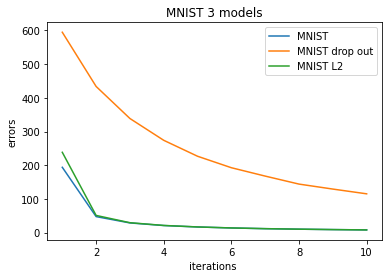

In [65]:
# Plot learning curve (with errors)
errors = np.squeeze(acce_mnist_train)
errors_rdp = np.squeeze(acce_mnist_train_rdp)
errors_rl = np.squeeze(acce_mnist_train_rl)
plt.plot(iterations,errors,label ='MNIST')
plt.plot(iterations,errors_rdp,label ='MNIST drop out')
plt.plot(iterations,errors_rl,label ='MNIST L2')
plt.ylabel('errors')
plt.xlabel('iterations ')
plt.title("MNIST 3 models")
plt.legend()
plt.show()

##Error Plot for MNIST (Train VS Test)

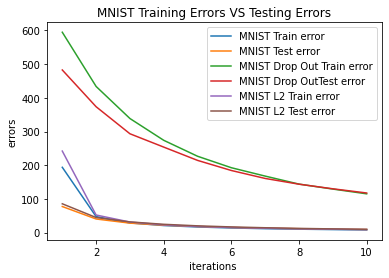

In [71]:
# Plot learning curve (with errors)
errors_train = np.squeeze(acce_mnist_train)
errors_test = np.squeeze(acce_mnist_test)
errors_train_rdp = np.squeeze(acce_mnist_train_rdp)
errors_test_rdp = np.squeeze(acce_mnist_test_rdp)
errors_train_rl = np.squeeze(acce_mnist_train_rl)
errors_test_rl = np.squeeze(acce_mnist_test_rl)
plt.plot(iterations,errors_train,label ='MNIST Train error')
plt.plot(iterations,errors_test,label ='MNIST Test error')
plt.plot(iterations,errors_train_rdp,label ='MNIST Drop Out Train error')
plt.plot(iterations,errors_test_rdp,label ='MNIST Drop OutTest error')
plt.plot(iterations,errors_train_rl,label ='MNIST L2 Train error')
plt.plot(iterations,errors_test_rl,label ='MNIST L2 Test error')
plt.ylabel('errors')
plt.xlabel('iterations ')
plt.title("MNIST Training Errors VS Testing Errors")
plt.legend()
plt.show()

##Plotting for fashion MNIST for 3 models

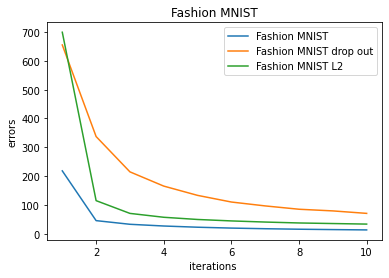

In [68]:
# Plot learning curve (with errors)
errors = np.squeeze(acce_fmnist_train)
errors_rdp = np.squeeze(acce_fmnist_train_rdp)
errors_rl = np.squeeze(acce_fmnist_train_rl)
plt.plot(iterations,errors,label='Fashion MNIST')
plt.plot(iterations,errors_rdp,label='Fashion MNIST drop out')
plt.plot(iterations,errors_rl,label='Fashion MNIST L2')
plt.ylabel('errors')
plt.xlabel('iterations ')
plt.title("Fashion MNIST")
plt.legend()
plt.show()

## Error Plot for fashion MNIST(train VS Test)

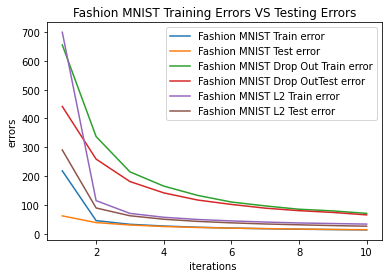

In [69]:
# Plot learning curve (with errors)
errors_train = np.squeeze(acce_fmnist_train)
errors_test = np.squeeze(acce_fmnist_test)
errors_train_rdp = np.squeeze(acce_fmnist_train_rdp)
errors_test_rdp = np.squeeze(acce_fmnist_test_rdp)
errors_train_rl = np.squeeze(acce_fmnist_train_rl)
errors_test_rl = np.squeeze(acce_fmnist_test_rl)
plt.plot(iterations,errors_train,label ='Fashion MNIST Train error')
plt.plot(iterations,errors_test,label ='Fashion MNIST Test error')
plt.plot(iterations,errors_train_rdp,label ='Fashion MNIST Drop Out Train error')
plt.plot(iterations,errors_test_rdp,label ='Fashion MNIST Drop OutTest error')
plt.plot(iterations,errors_train_rl,label ='Fashion MNIST L2 Train error')
plt.plot(iterations,errors_test_rl,label ='Fashion MNIST L2 Test error')
plt.ylabel('errors')
plt.xlabel('iterations ')
plt.title("Fashion MNIST Training Errors VS Testing Errors")
plt.legend()
plt.show()

## One Step Inference
## Default Mode for MNIST

In [19]:
print("For MNIST inference\n")
#list to store inferences of test for 10 seeds
inference_mnist=[]
inference_mnist_rdp=[]
inference_mnist_rl=[]
inference_fmnist=[]
inference_fmnist_rdp=[]
inference_fmnist_rl=[]
##accuracy
inference_mnist_acc=[]
inference_mnist_rdp_acc=[]
inference_mnist_rl_acc=[]
inference_fmnist_acc=[]
inference_fmnist_rdp_acc=[]
inference_fmnist_rl_acc=[]

Inferences_seeds=[5097,1111,1234,5678,199991,99999,3421,6642,8754,3454444]
#Default mode
mlp_on_default = MLP(size_input, size_hidden, size_output)
#Default mode for L2 reguralization
mlp_on_default_l = MLP_RegL(size_input, size_hidden, size_output)
#Default mode for drop out
mlp_on_default_dp = MLP_Regdp(size_input, size_hidden, size_output)
test_loss_total = tf.Variable(0, dtype=tf.float32)
for seed in Inferences_seeds:
  print("For seed:{}\n".format(seed))
  # Test DS for MNIST 
  test_ds_mnist = tf.data.Dataset.from_tensor_slices((X_test_mnist, y_test_mnist)).shuffle(25, seed=epoch*(seed)).batch(100)
  #MNIST
  test_loss_total = 0.0
  accuracy=0
  for inputs, outputs in test_ds_mnist:
    preds = mlp_on_default.forward(inputs)
    #b = mlp_on_default.loss(preds, outputs)
    test_loss_total = test_loss_total + mlp_on_default.loss(preds, outputs)
    accuracy=tf.keras.metrics.CategoricalAccuracy()
    accuracy.update_state(preds, outputs)
  inference_mnist.append(np.sum(test_loss_total.numpy()) / X_test_mnist.shape[0])
  inference_mnist_acc.append(accuracy.result()*100)
  print('Test MSE: {:.4f}- Accuracy:={}'.format(np.sum(test_loss_total.numpy()) / X_test_mnist.shape[0],accuracy.result()*100))
  test_loss_total = 0.0
  accuracy=0
  for inputs, outputs in test_ds_mnist:
    preds = mlp_on_default_dp.forward(inputs)
    #b = mlp_on_default.loss(preds, outputs)
    test_loss_total = test_loss_total + mlp_on_default_dp.loss(preds, outputs)
    accuracy=tf.keras.metrics.CategoricalAccuracy()
    accuracy.update_state(preds, outputs)
  inference_mnist_rdp.append(np.sum(test_loss_total.numpy()) / X_test_mnist.shape[0])
  inference_mnist_rdp_acc.append(accuracy.result()*100)
  print('Drop out Test MSE: {:.4f}- Accuracy:={}'.format(np.sum(test_loss_total.numpy()) / X_test_mnist.shape[0],accuracy.result()*100))
  test_loss_total = 0.0
  accuracy=0
  for inputs, outputs in test_ds_mnist:
    preds = mlp_on_default_l.forward(inputs)
    #b = mlp_on_default.loss(preds, outputs)
    test_loss_total = test_loss_total + mlp_on_default_l.loss(preds, outputs)
    accuracy=tf.keras.metrics.CategoricalAccuracy()
    accuracy.update_state(preds, outputs)
  inference_mnist_rl.append(np.sum(test_loss_total.numpy()) / X_test_mnist.shape[0])
  inference_mnist_rl_acc.append(accuracy.result()*100)
  print('L2Test MSE: {:.4f}- Accuracy:={}'.format(np.sum(test_loss_total.numpy()) / X_test_mnist.shape[0],accuracy.result()*100))
  print("\n")

For MNIST inference

For seed:5097

Test MSE: 560.5309- Accuracy:=10.0
Drop out Test MSE: 512.6189- Accuracy:=12.0
L2Test MSE: 1104.2846- Accuracy:=10.0


For seed:1111

Test MSE: 560.5309- Accuracy:=10.0
Drop out Test MSE: 515.2714- Accuracy:=14.0
L2Test MSE: 1104.2846- Accuracy:=10.0


For seed:1234

Test MSE: 560.5309- Accuracy:=10.0
Drop out Test MSE: 505.5651- Accuracy:=17.0
L2Test MSE: 1104.2846- Accuracy:=10.0


For seed:5678

Test MSE: 560.5309- Accuracy:=10.0
Drop out Test MSE: 509.4269- Accuracy:=9.0
L2Test MSE: 1104.2846- Accuracy:=10.0


For seed:199991

Test MSE: 560.5309- Accuracy:=10.0
Drop out Test MSE: 514.7587- Accuracy:=13.0
L2Test MSE: 1104.2846- Accuracy:=10.0


For seed:99999

Test MSE: 560.5309- Accuracy:=10.0
Drop out Test MSE: 505.6617- Accuracy:=12.0
L2Test MSE: 1104.2846- Accuracy:=10.0


For seed:3421

Test MSE: 560.5309- Accuracy:=10.0
Drop out Test MSE: 515.3543- Accuracy:=9.0
L2Test MSE: 1104.2846- Accuracy:=10.0


For seed:6642

Test MSE: 560.5309- Accur

In [20]:
print("For Fashion MNIST inference\n")
for seed in Inferences_seeds:
  print("For seed:{}\n".format(seed))
  # Test DS for MNIST 
  test_ds_fmnist = tf.data.Dataset.from_tensor_slices((X_test_fmnist, y_test_fmnist)).shuffle(25, seed=epoch*(seed)).batch(100)
  #MNIST
  test_loss_total = 0.0
  accuracy=0
  for inputs, outputs in test_ds_fmnist:
    preds = mlp_on_default.forward(inputs)
    #b = mlp_on_default.loss(preds, outputs)
    test_loss_total = test_loss_total + mlp_on_default.loss(preds, outputs)
    accuracy=tf.keras.metrics.CategoricalAccuracy()
    accuracy.update_state(preds, outputs)
  inference_fmnist.append(np.sum(test_loss_total.numpy()) / X_test_fmnist.shape[0])
  inference_fmnist_acc.append(accuracy.result()*100)
  print('Test MSE: {:.4f}- Accuracy:={}'.format(np.sum(test_loss_total.numpy()) / X_test_fmnist.shape[0],accuracy.result()*100))
  test_loss_total = 0.0
  accuracy=0
  for inputs, outputs in test_ds_fmnist:
    preds = mlp_on_default_dp.forward(inputs)
    #b = mlp_on_default.loss(preds, outputs)
    test_loss_total = test_loss_total + mlp_on_default_dp.loss(preds, outputs)
    accuracy=tf.keras.metrics.CategoricalAccuracy()
    accuracy.update_state(preds, outputs)
  inference_fmnist_rdp.append(np.sum(test_loss_total.numpy()) / X_test_fmnist.shape[0])
  inference_fmnist_rdp_acc.append(accuracy.result()*100)
  print('Drop out Test MSE: {:.4f}- Accuracy:={}'.format(np.sum(test_loss_total.numpy()) / X_test_fmnist.shape[0],accuracy.result()*100))
  test_loss_total = 0.0
  accuracy=0
  for inputs, outputs in test_ds_fmnist:
    preds = mlp_on_default_l.forward(inputs)
    #b = mlp_on_default.loss(preds, outputs)
    test_loss_total = test_loss_total + mlp_on_default_l.loss(preds, outputs)
    accuracy=tf.keras.metrics.CategoricalAccuracy()
    accuracy.update_state(preds, outputs)
  inference_fmnist_rl.append(np.sum(test_loss_total.numpy()) / X_test_fmnist.shape[0])
  inference_fmnist_rl_acc.append(accuracy.result()*100)
  print('L2Test MSE: {:.4f}- Accuracy:={}'.format(np.sum(test_loss_total.numpy()) / X_test_fmnist.shape[0],accuracy.result()*100))
  print("\n")

For Fashion MNIST inference

For seed:5097

Test MSE: 721.9364- Accuracy:=0.0
Drop out Test MSE: 849.7916- Accuracy:=10.0
L2Test MSE: 1372.9331- Accuracy:=15.000000953674316


For seed:1111

Test MSE: 721.9364- Accuracy:=0.0
Drop out Test MSE: 854.6885- Accuracy:=10.0
L2Test MSE: 1372.9331- Accuracy:=15.000000953674316


For seed:1234

Test MSE: 721.9364- Accuracy:=0.0
Drop out Test MSE: 852.0114- Accuracy:=7.0
L2Test MSE: 1372.9331- Accuracy:=15.000000953674316


For seed:5678

Test MSE: 721.9364- Accuracy:=0.0
Drop out Test MSE: 850.7234- Accuracy:=9.0
L2Test MSE: 1372.9331- Accuracy:=15.000000953674316


For seed:199991

Test MSE: 721.9364- Accuracy:=0.0
Drop out Test MSE: 849.5248- Accuracy:=12.0
L2Test MSE: 1372.9331- Accuracy:=15.000000953674316


For seed:99999

Test MSE: 721.9364- Accuracy:=0.0
Drop out Test MSE: 840.1119- Accuracy:=8.0
L2Test MSE: 1372.9331- Accuracy:=15.000000953674316


For seed:3421

Test MSE: 721.9364- Accuracy:=0.0
Drop out Test MSE: 849.9523- Accuracy:=6

##Plot for single inferene for MNIST and Fashion MNIST

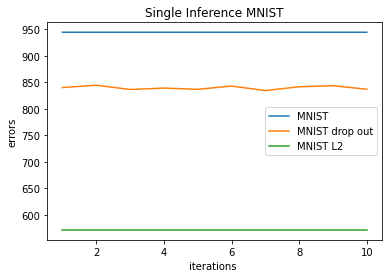

In [118]:
# Plot learning curve (with errors)
errors_inf = np.squeeze(inference_mnist)
errors_rdp_inf = np.squeeze(inference_mnist_rdp)
errors_rl_inf = np.squeeze(inference_mnist_rl)
plt.plot(iterations,errors_inf,label='MNIST')
plt.plot(iterations,errors_rdp_inf,label='MNIST drop out')
plt.plot(iterations,errors_rl_inf,label='MNIST L2')
plt.ylabel('errors')
plt.xlabel('iterations ')
plt.title("Single Inference MNIST")
plt.legend()
plt.show()

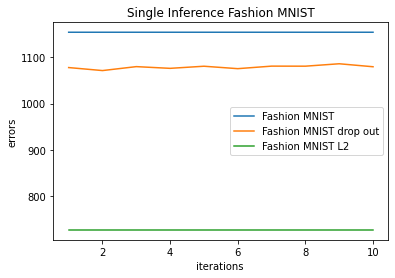

In [119]:
# Plot learning curve (with errors)
errors_inf = np.squeeze(inference_fmnist)
errors_rdp_inf = np.squeeze(inference_fmnist_rdp)
errors_rl_inf = np.squeeze(inference_fmnist_rl)
plt.plot(iterations,errors_inf,label='Fashion MNIST')
plt.plot(iterations,errors_rdp_inf,label='Fashion MNIST drop out')
plt.plot(iterations,errors_rl_inf,label='Fashion MNIST L2')
plt.ylabel('errors')
plt.xlabel('iterations ')
plt.title("Single Inference Fashion MNIST")
plt.legend()
plt.show()